In [16]:
from games.kuhn import KuhnPoker
from agents.counterfactualregret_t import CounterFactualRegret
import matplotlib.pyplot as plt

In [17]:
g = KuhnPoker()

In [18]:
agent_classes = [CounterFactualRegret, CounterFactualRegret]
my_agents = {}
for i, agent in enumerate(g.agents):
    my_agents[agent] = agent_classes[i](game=g, agent=agent)

In [19]:
g.reset()
while not g.done():
    g.render()
    print(f"Agent {g.agent_selection}")
    action = my_agents[g.agent_selection].action()
    print(f"Action {action} - move {g.action_move(action)}")
    g.step(action)
g.render()
for agent in g.agents:
    print(f"Reward {agent} = {g.reward(agent)}")

agent_0 K 
agent_1 J 
Agent agent_1
Node does not exist. Playing random.
Action 0 - move p
agent_0 K p
agent_1 J p
Agent agent_0
Node does not exist. Playing random.
Action 0 - move p
agent_0 K pp
agent_1 J pp
Reward agent_0 = 1
Reward agent_1 = -1


In [20]:
for agent in g.agents:
    print('Training agent ' + agent)
    my_agents[agent].train(10000)
    print(dict(map(lambda n: (n, my_agents[agent].node_dict[n].policy()), my_agents[agent].node_dict.keys())))

Training agent agent_0
{'0': array([9.99850142e-01, 1.49857635e-04]), '1p': array([9.99849692e-01, 1.50308132e-04]), '0pb': array([9.99737729e-01, 2.62270513e-04]), '1b': array([0.99766696, 0.00233304]), '1': array([9.99851345e-01, 1.48654675e-04]), '0p': array([9.99850991e-01, 1.49009090e-04]), '1pb': array([0.88069357, 0.11930643]), '0b': array([0.99895694, 0.00104306]), '2': array([9.99328817e-01, 6.71182520e-04]), '2pb': array([1.13622865e-04, 9.99886377e-01]), '2p': array([9.99510468e-01, 4.89531556e-04]), '2b': array([1.50625094e-04, 9.99849375e-01])}
Training agent agent_1
{'2': array([9.99851654e-01, 1.48345943e-04]), '0p': array([9.99853865e-01, 1.46134736e-04]), '2pb': array([0.5, 0.5]), '0b': array([9.99853865e-01, 1.46134736e-04]), '0': array([9.99846178e-01, 1.53822489e-04]), '1p': array([9.99846225e-01, 1.53775181e-04]), '0pb': array([9.99884624e-01, 1.15375740e-04]), '1b': array([9.99846225e-01, 1.53775181e-04]), '1': array([9.99852093e-01, 1.47907114e-04]), '1pb': array

In [21]:
for obs, node in my_agents[agent].node_dict.items():
    print(f"{obs} regrets: {node.cum_regrets}, policy: {node.policy()}")

2 regrets: [ 1.000e+00 -6.739e+03], policy: [9.99851654e-01 1.48345943e-04]
0p regrets: [ 1.250000e-01 -1.709625e+03], policy: [9.99853865e-01 1.46134736e-04]
2pb regrets: [0. 0.], policy: [0.5 0.5]
0b regrets: [ 0.75 -3.75], policy: [9.99853865e-01 1.46134736e-04]
0 regrets: [ 3.75000e-01 -7.84875e+02], policy: [9.99846178e-01 1.53822489e-04]
1p regrets: [ 1.250000e-01 -4.017375e+03], policy: [9.99846225e-01 1.53775181e-04]
0pb regrets: [ 0.75 -2.25], policy: [9.99884624e-01 1.15375740e-04]
1b regrets: [ 0.75 -2.25], policy: [9.99846225e-01 1.53775181e-04]
1 regrets: [ 1.0000e+00 -4.1205e+03], policy: [9.99852093e-01 1.47907114e-04]
1pb regrets: [0. 0.], policy: [0.5 0.5]
2p regrets: [ 2.50000e-01 -4.17775e+03], policy: [9.99849782e-01 1.50217816e-04]
2b regrets: [0. 0.], policy: [0.5 0.5]


In [22]:
cum_rewards = dict(map(lambda agent: (agent, 0.), g.agents))
wins = dict(map(lambda agent: (agent, 0), g.agents))
niter = 2000
for i in range(niter):
    g.reset()
    turn = 0
    while not g.done():
        print('Turn: ', turn)
        print('\tPlayer: ', g.agent_selection)
        print('\tObservation: ', g.observe(g.agent_selection))
        a = my_agents[g.agent_selection].action()
        print('\tAction: ', g._moves[a])
        g.step(action=a)
        turn += 1

    print(f'Game {i+1} - Rewards: {g.rewards}')
    for agent in g.agents:
        cum_rewards[agent] += g.rewards[agent]

    max_reward = max(g.rewards.values())
    winners = [agent for agent, reward in g.rewards.items() if reward == max_reward]

    if len(winners) == 1:
        wins[winners[0]] += 1
        print(f'Winner of Game {i+1}: {winners[0]}')
    else:
        print(f'Game {i+1} ended in a tie between: {winners}')
    
    max_reward = max(g.rewards.values())
    winners = [agent for agent, reward in g.rewards.items() if reward == max_reward]
    if len(winners) == 1: 
        wins[winners[0]] += 1

print(f'Average rewards in {niter} games:', dict(map(lambda agent: (agent, cum_rewards[agent]/niter), g.agents)))
print('Wins:', wins)

Turn:  0
	Player:  agent_1
	Observation:  1
	Action:  p
Turn:  1
	Player:  agent_0
	Observation:  0p
	Action:  p
Game 1 - Rewards: {'agent_0': -1, 'agent_1': 1}
Winner of Game 1: agent_1
Turn:  0
	Player:  agent_1
	Observation:  0
	Action:  p
Turn:  1
	Player:  agent_0
	Observation:  1p
	Action:  p
Game 2 - Rewards: {'agent_0': 1, 'agent_1': -1}
Winner of Game 2: agent_0
Turn:  0
	Player:  agent_1
	Observation:  0
	Action:  p
Turn:  1
	Player:  agent_0
	Observation:  1p
	Action:  p
Game 3 - Rewards: {'agent_0': 1, 'agent_1': -1}
Winner of Game 3: agent_0
Turn:  0
	Player:  agent_1
	Observation:  2
	Action:  p
Turn:  1
	Player:  agent_0
	Observation:  1p
	Action:  p
Game 4 - Rewards: {'agent_0': -1, 'agent_1': 1}
Winner of Game 4: agent_1
Turn:  0
	Player:  agent_1
	Observation:  0
	Action:  p
Turn:  1
	Player:  agent_0
	Observation:  1p
	Action:  p
Game 5 - Rewards: {'agent_0': 1, 'agent_1': -1}
Winner of Game 5: agent_0
Turn:  0
	Player:  agent_1
	Observation:  2
	Action:  p
Turn:  1


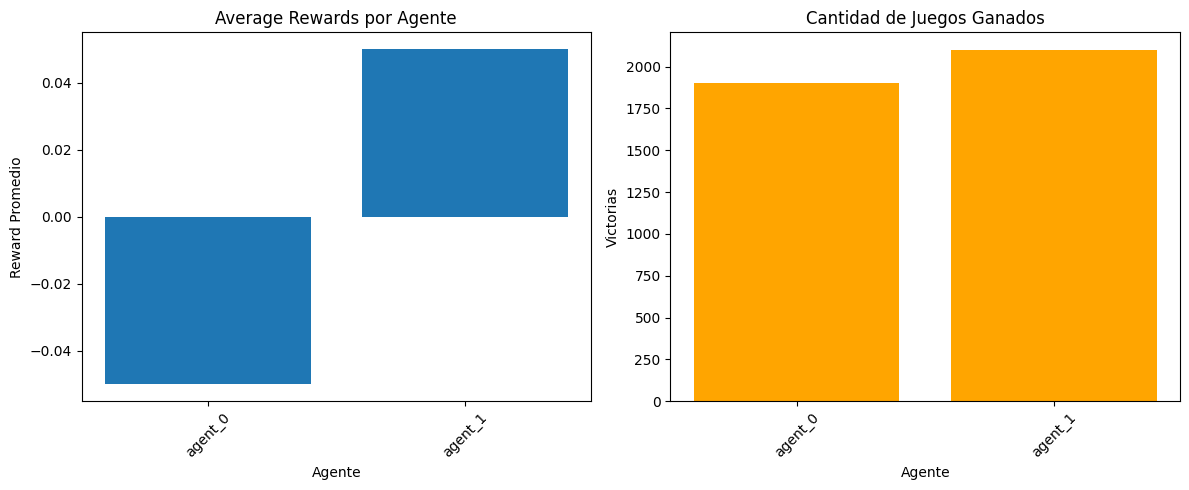

In [23]:
avg_rewards = {agent: cum_rewards[agent] / niter for agent in g.agents}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(avg_rewards.keys(), avg_rewards.values())
axes[0].set_title('Average Rewards por Agente')
axes[0].set_ylabel('Reward Promedio')
axes[0].set_xlabel('Agente')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(wins.keys(), wins.values(), color='orange')
axes[1].set_title('Cantidad de Juegos Ganados')
axes[1].set_ylabel('Victorias')
axes[1].set_xlabel('Agente')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
from nbconvert import HTMLExporter
import nbformat, os, time

def save_notebook_to_html(notebook_path=f"KuhnPoker.ipynb"):
    """Guarda el notebook como HTML"""
    exporter = HTMLExporter()
    notebook = nbformat.read(notebook_path, as_version=4)
    html, _ = exporter.from_notebook_node(notebook)
    
    os.makedirs("notebook_exports", exist_ok=True)
    timestamp = time.strftime("%Y%m%d-%H%M%S")
    output_path = f"notebook_exports/KuhnPoker_CFRMvsCFRM_{timestamp}.html"
    
    with open(output_path, "w") as f:
        f.write(html)
    
    return output_path

In [ ]:
save_notebook_to_html()